In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
taxi_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(taxi_tickets.dtypes)
print(taxi_tickets.shape)
taxi_tickets.head()

Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object
(261936, 16)


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


In [3]:
print('Total tickets issued to taxis: {}'.format(taxi_tickets['Ticket Number'].count()))

Total tickets issued to taxis: 261936


In [4]:
# All types of parking tickets issued to taxis
ticket_descriptions = taxi_tickets['Violation Description'].unique().tolist()
for description in ticket_descriptions:
    print(description)

EXPIRED METER OR OVERSTAY
TRUCK,MOTOR HOME, BUS BUSINESS STREET
TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET
EXPIRED PLATES OR TEMPORARY REGISTRATION
PARK OR STAND IN BUS/TAXI/CARRIAGE STAND
PARKING/STANDING PROHIBITED ANYTIME
RUSH HOUR PARKING
DOUBLE PARKING OR STANDING
NO STANDING/PARKING TIME RESTRICTED
PARK OUTSIDE METERED SPACE
OBSTRUCT ROADWAY
RESIDENTIAL PERMIT PARKING
WITHIN 15' OF FIRE HYDRANT
STREET CLEANING
REAR AND FRONT PLATE REQUIRED
STAND, PARK, OR OTHER USE OF BUS LANE
PARK OR STAND ON CROSSWALK
CURB LOADING ZONE
DISABLED CURB CUT
SAFETY BELTS REQUIRED
BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE
3-7 AM SNOW ROUTE
PARK OR STAND ON SIDEWALK
TWO HEAD LAMPS REQUIRED VISIBLE 1000'
PARK OR STAND ON CHA PROPERTY
NO PARKING IN LOOP
NO CITY STICKER OR IMPROPER DISPLAY
WRONG DIRECTION OR 12'' FROM CURB
PARK OR STAND NEAR FIRE STATION OR RR XX
PARK OR STAND ON PARKWAY
STOP SIGN OR TRAFFIC SIGNAL
20'OF CROSSWALK
PARK OR BLOCK ALLEY
PARKED/STANDING UNATTENDED W/MOTOR RUNNI
SNOW ROUTE: 2'' OF S

Ticket Categories by number of taxi tickets issued


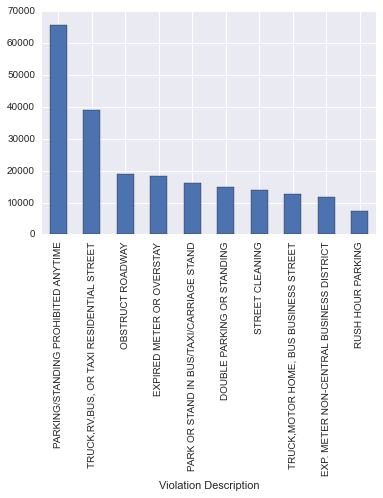

In [5]:
ticket_cat_group = taxi_tickets.groupby(['Violation Description'])['Ticket Number'].count()
ticket_cat_group = ticket_cat_group.sort_values(ascending=False)
ticket_group_subset = ticket_cat_group[:10]
print('Ticket Categories by number of taxi tickets issued')
ticket_group_subset.plot(kind='bar')

Ticketed Plate State by number of taxi tickets issued


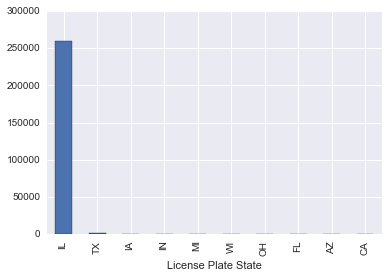

In [6]:
state_group = taxi_tickets.groupby(['License Plate State'])['Ticket Number'].count()
state_group = state_group.sort_values(ascending=False)
state_group_top = state_group[:10]
print('Ticketed Plate State by number of taxi tickets issued')
state_group_top.plot(kind='bar')

Ticketed Vehicle Make by number of taxi tickets issued


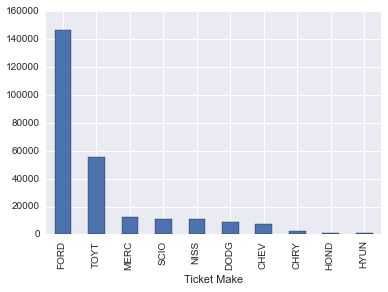

In [7]:
make_group = taxi_tickets.groupby(['Ticket Make'])['Ticket Number'].count()
make_group = make_group.sort_values(ascending=False)
make_group_sub = make_group[:10]
print('Ticketed Vehicle Make by number of taxi tickets issued')
make_group_sub.plot(kind='bar')

Ward by number of taxi tickets issued


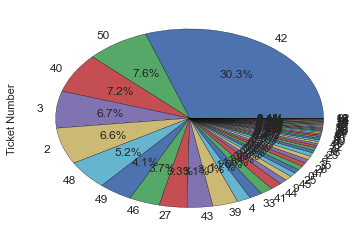

In [8]:
ward_group = taxi_tickets.groupby(['Ward'])['Ticket Number'].count()
ward_group = ward_group.sort_values(ascending=False)
print('Ward by number of taxi tickets issued')
ward_group.plot(kind='pie',autopct='%1.1f%%', fontsize=12)

Status in queue by number of taxi tickets issued


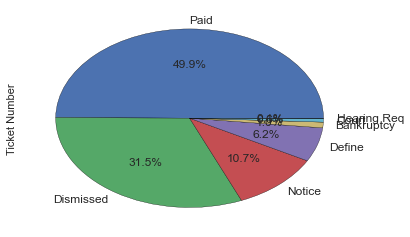

In [11]:
queue_group = taxi_tickets.groupby(['Ticket Queue'])['Ticket Number'].count()
queue_group = queue_group.sort_values(ascending=False)
print('Status in queue by number of taxi tickets issued')
queue_group.plot(kind='pie',autopct='%1.1f%%', fontsize=12)

Hearing status by number of taxi tickets issued


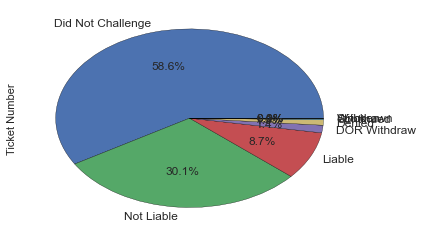

In [12]:
hearing_group = taxi_tickets.groupby(['Hearing Dispo'])['Ticket Number'].count()
hearing_group = hearing_group.sort_values(ascending=False)
print('Hearing status by number of taxi tickets issued')
hearing_group.plot(kind='pie',autopct='%1.1f%%', fontsize=12)

Number of tickets issued to taxis over time


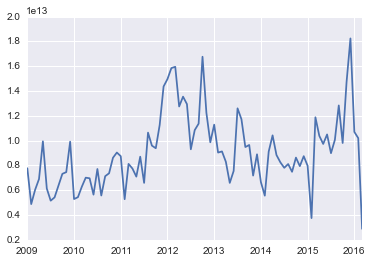

In [13]:
taxi_tickets['Issue Date'] = pd.to_datetime(taxi_tickets['Issue Date'])
taxi_tickets = taxi_tickets.set_index(pd.DatetimeIndex(taxi_tickets['Issue Date']))
taxi_ticket_series = taxi_tickets['Ticket Number'].resample('M').sum()
print('Number of tickets issued to taxis over time')
taxi_ticket_series.plot()